In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
print(df.shape)

(5110, 12)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
df[['gender','ever_married','work_type','Residence_type','smoking_status']	]=df[['gender','ever_married','work_type','Residence_type','smoking_status']	].apply(LabelEncoder().fit_transform)


In [ ]:
df = df.dropna()

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


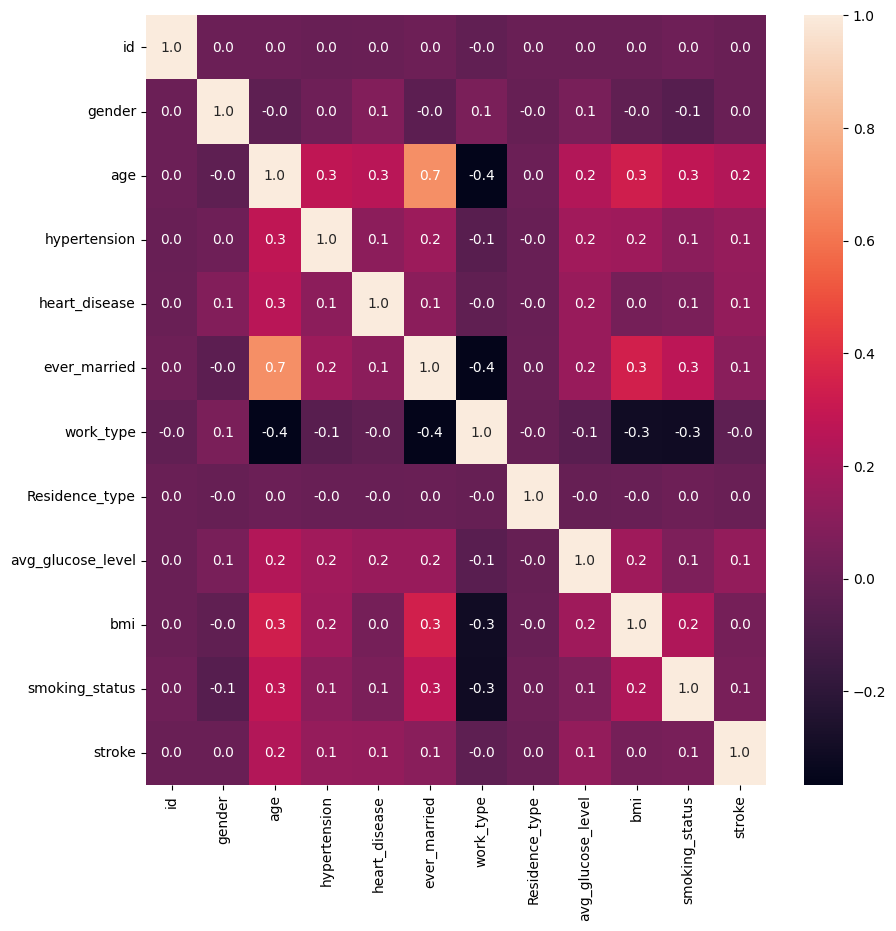

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

[0 1] [4700  209]


<ipython-input-21-98c466f043fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Normal','Stroke'], y=counts,palette=['b', 'g'])


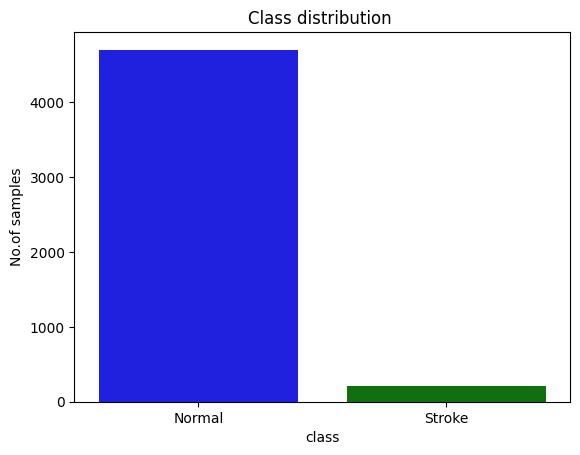

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
(unique,counts)= np.unique(df['stroke'],return_counts=True)
print(unique,counts)
sns.barplot(x=['Normal','Stroke'], y=counts,palette=['b', 'g'])
plt.xlabel("class")
plt.ylabel("No.of samples")
plt.xticks()
plt.title('Class distribution ')
plt.show()

In [ ]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)
print(y_resampled.value_counts())


(9400, 10)
(9400,)
1    4700
0    4700
Name: stroke, dtype: int64


<ipython-input-28-75be7b082089>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=values, palette=['b', 'g'])


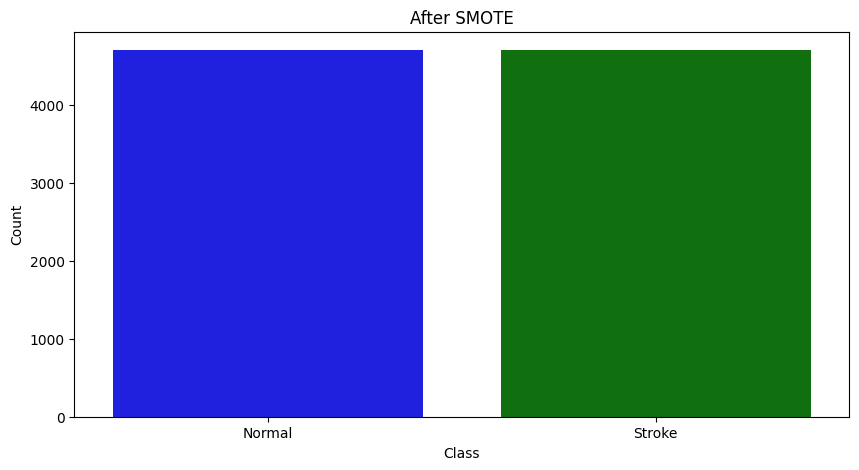

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming cm is the confusion matrix
# creating the dataset
data = {'Normal':4700, 'Stroke':4700}
classes = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot

sns.barplot(x=classes, y=values, palette=['b', 'g'])

# Set the y-axis label
plt.ylabel('Count')
plt.xlabel('Class')
# Set the title
plt.title('After SMOTE')

# Show the plot
plt.show()


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0     0.8107    0.7896    0.8000       922
           1     0.8024    0.8225    0.8124       958

    accuracy                         0.8064      1880
   macro avg     0.8066    0.8061    0.8062      1880
weighted avg     0.8065    0.8064    0.8063      1880



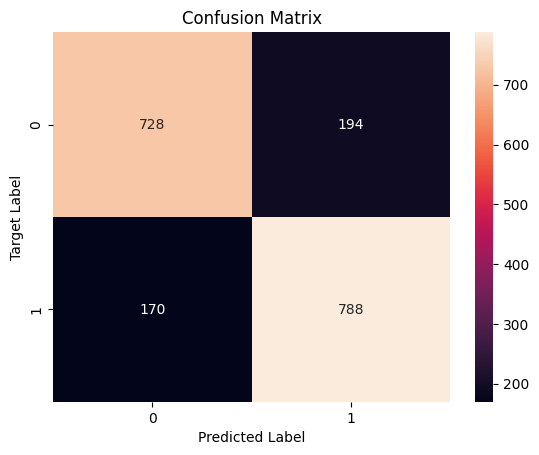

Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0     0.8112    0.7874    0.7991       922
           1     0.8010    0.8236    0.8121       958

    accuracy                         0.8059      1880
   macro avg     0.8061    0.8055    0.8056      1880
weighted avg     0.8060    0.8059    0.8058      1880



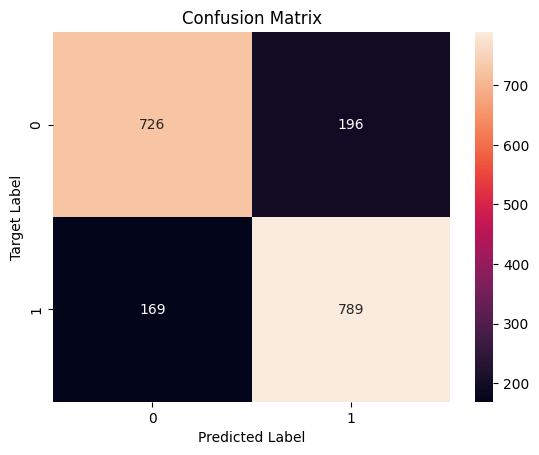

Classification Report: Decision Trees
              precision    recall  f1-score   support

           0     0.9344    0.8959    0.9147       922
           1     0.9036    0.9395    0.9212       958

    accuracy                         0.9181      1880
   macro avg     0.9190    0.9177    0.9180      1880
weighted avg     0.9187    0.9181    0.9180      1880



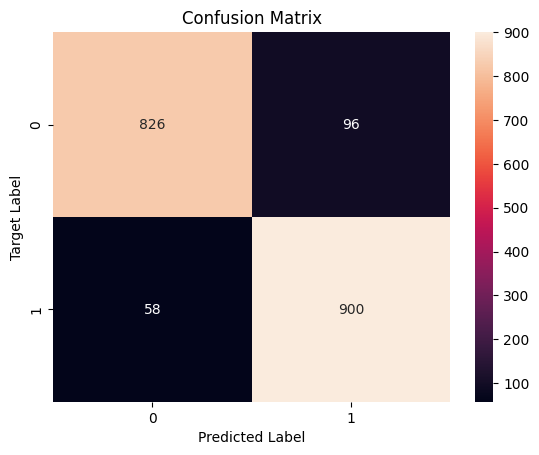

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0     0.8204    0.7332    0.7743       922
           1     0.7670    0.8455    0.8044       958

    accuracy                         0.7904      1880
   macro avg     0.7937    0.7894    0.7894      1880
weighted avg     0.7932    0.7904    0.7896      1880



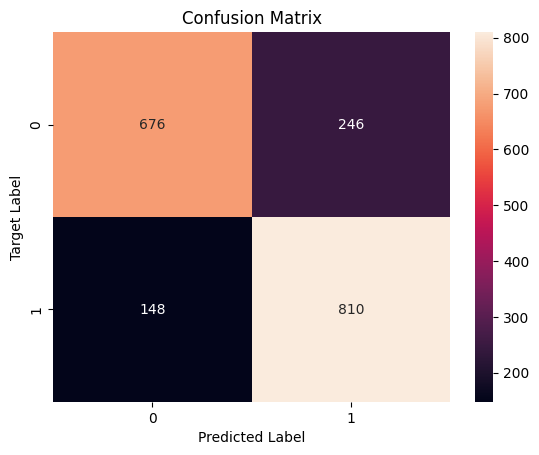

Classification Report: K-Nearest Neighbor
              precision    recall  f1-score   support

           0     0.9485    0.8189    0.8789       922
           1     0.8459    0.9572    0.8981       958

    accuracy                         0.8894      1880
   macro avg     0.8972    0.8880    0.8885      1880
weighted avg     0.8962    0.8894    0.8887      1880



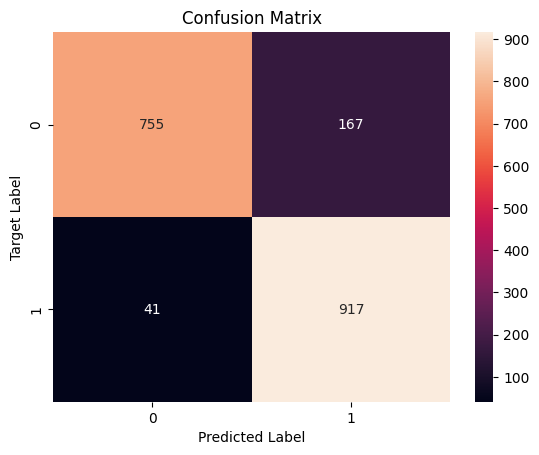

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_train, Y_train)

    # Prediction
    predictions = models[key].predict(X_val)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, Y_val)
    precision[key] = precision_score(predictions, Y_val)
    recall[key] = recall_score(predictions, Y_val)
    Y_predict = models[key].predict(X_val)

    print('Classification Report:',key)
    print(classification_report(Y_val,predictions,digits=4))


    sns.heatmap(confusion_matrix(Y_val,predictions),fmt='',annot=True)

    plt.xlabel('Predicted Label')
    plt.ylabel('Target Label')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
import pandas as pd
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision']= precision.values()
df_model['Recall'] = recall.values()

df_model.round(4)

,Accuracy,Precision,Recall
Logistic Regression,0.8064,0.8225,0.8024
Support Vector Machines,0.8059,0.8236,0.8010
Decision Trees,0.9181,0.9395,0.9036
Naive Bayes,0.7904,0.8455,0.7670
K-Nearest Neighbor,0.8894,0.9572,0.8459


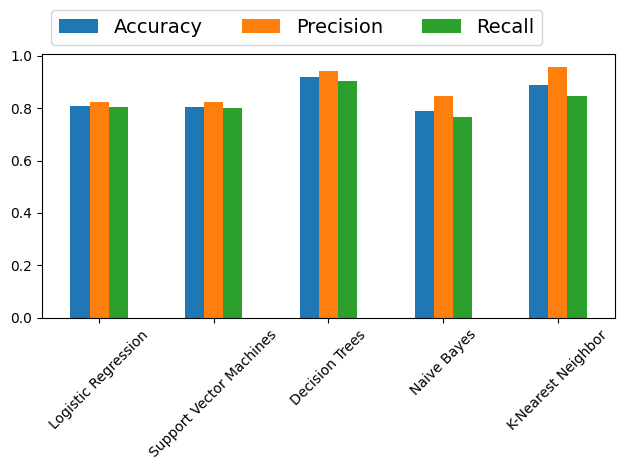

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

In [ ]:
accuracy_ensemble, precision_ensemble, recall_ensemble = {}, {}, {}
models_ensemble = {}

In [ ]:
def evaluate(model, X_train, X_val, Y_train, y_val,key):

    model.fit(X_train, Y_train)

    # Prediction
    predictions = model.predict(X_val)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy_ensemble[key]= accuracy_score(predictions, y_val)
    precision_ensemble[key] = precision_score(predictions, y_val)
    recall_ensemble[key] = recall_score(predictions, y_val)

    auc = roc_auc_score(y_val, Y_predict)
    print('Classification Report:')
    print(classification_report(y_val,predictions,digits=4))






    sns.heatmap(confusion_matrix(Y_val,predictions),fmt='',annot=True)

    plt.title('Confusion Matrix')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

Classification Report:
              precision    recall  f1-score   support

           0     0.9638    0.9523    0.9580       922
           1     0.9546    0.9656    0.9600       958

    accuracy                         0.9590      1880
   macro avg     0.9592    0.9589    0.9590      1880
weighted avg     0.9591    0.9590    0.9590      1880



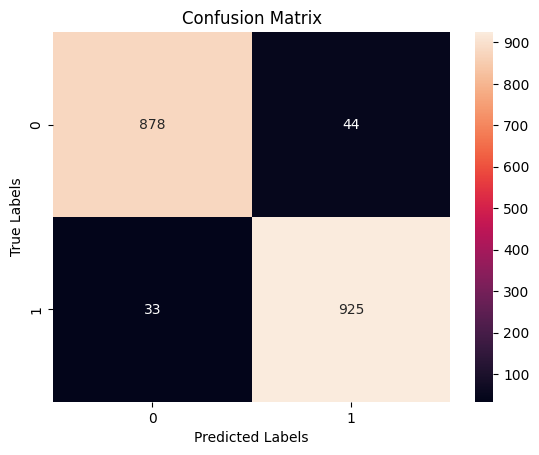

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
models_ensemble['Random Forest'] = RandomForestClassifier()
evaluate(models_ensemble['Random Forest'], X_train, X_val, Y_train, Y_val,'Random Forest')

Classification Report:
              precision    recall  f1-score   support

           0     0.9654    0.9382    0.9516       922
           1     0.9421    0.9676    0.9547       958

    accuracy                         0.9532      1880
   macro avg     0.9537    0.9529    0.9531      1880
weighted avg     0.9535    0.9532    0.9532      1880



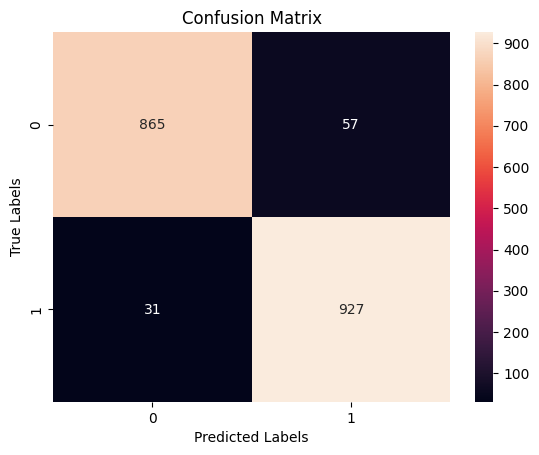

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
models_ensemble['Extra Tree Classifier']=ExtraTreesClassifier(n_estimators=1000, max_features=10, random_state=42)
evaluate(models_ensemble['Extra Tree Classifier'], X_train, X_val, Y_train, Y_val,'Extra Tree Classifier')



Classification Report:
              precision    recall  f1-score   support

           0     0.9633    0.9382    0.9505       922
           1     0.9420    0.9656    0.9536       958

    accuracy                         0.9521      1880
   macro avg     0.9526    0.9519    0.9521      1880
weighted avg     0.9524    0.9521    0.9521      1880



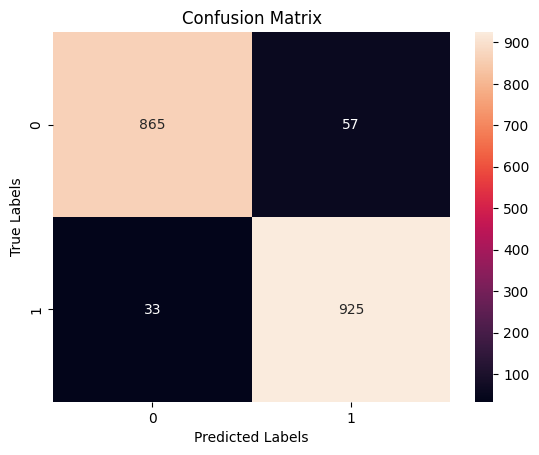

In [ ]:

#XGBoost
from xgboost import XGBClassifier
models_ensemble['Xgboost'] = XGBClassifier()
evaluate(models_ensemble['Xgboost'], X_train, X_val, Y_train, Y_val,'XgbClassifier')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0     0.9710    0.9447    0.9577       922
           1     0.9481    0.9729    0.9603       958

    accuracy                         0.9590      1880
   macro avg     0.9596    0.9588    0.9590      1880
weighted avg     0.9593    0.9590    0.9590      1880



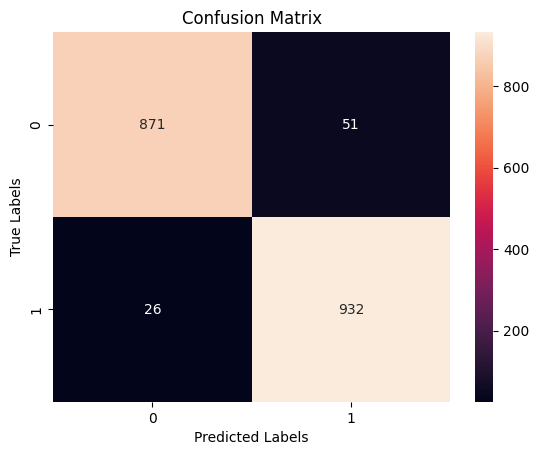

In [ ]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

tree = XGBClassifier()
models_ensemble['Bagging'] = BaggingClassifier(base_estimator=tree, n_estimators=40, random_state=0)
#bagging_clf.fit(X_train, Y_train)

evaluate(models_ensemble['Bagging'], X_train, X_val, Y_train, Y_val,'Bagging')

Classification Report:
              precision    recall  f1-score   support

           0     0.9108    0.8633    0.8864       922
           1     0.8748    0.9186    0.8961       958

    accuracy                         0.8915      1880
   macro avg     0.8928    0.8910    0.8913      1880
weighted avg     0.8924    0.8915    0.8914      1880



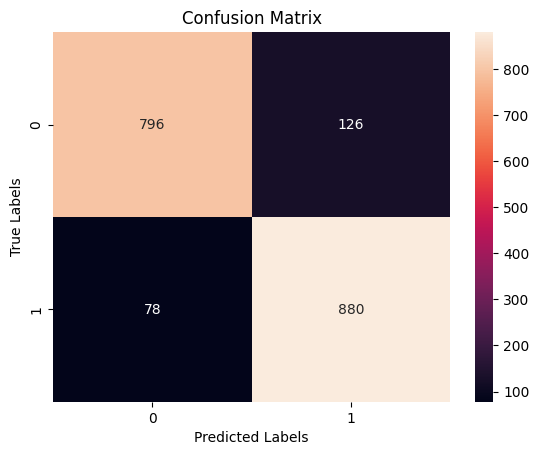

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

models_ensemble['Gradient Boost'] = GradientBoostingClassifier(n_estimators=100, random_state=42)
evaluate(models_ensemble['Gradient Boost'], X_train, X_val, Y_train, Y_val, 'Gradient Boost')


Classification Report:
              precision    recall  f1-score   support

           0     0.9623    0.9425    0.9523       922
           1     0.9458    0.9645    0.9550       958

    accuracy                         0.9537      1880
   macro avg     0.9541    0.9535    0.9537      1880
weighted avg     0.9539    0.9537    0.9537      1880



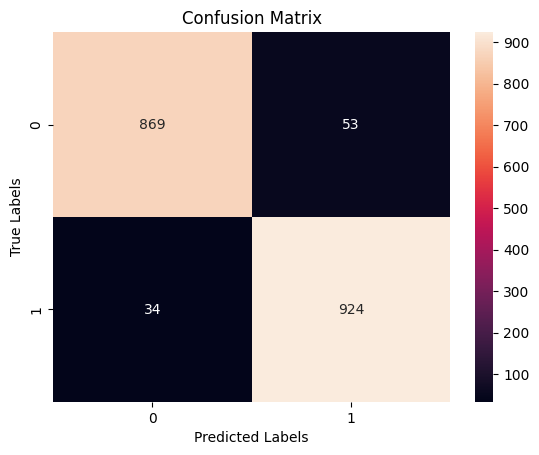

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = DecisionTreeClassifier()
models_ensemble['Soft Voting'] = VotingClassifier(estimators=[('ExTrees', clf1), ('Random Forest', clf2), ('XGB', clf3),('Decision Tree',clf4)], voting='soft')
evaluate(models_ensemble['Soft Voting'],X_train, X_val, Y_train, Y_val,'Soft Voting')



Classification Report:
              precision    recall  f1-score   support

           0     0.9598    0.9577    0.9587       922
           1     0.9594    0.9614    0.9604       958

    accuracy                         0.9596      1880
   macro avg     0.9596    0.9595    0.9596      1880
weighted avg     0.9596    0.9596    0.9596      1880



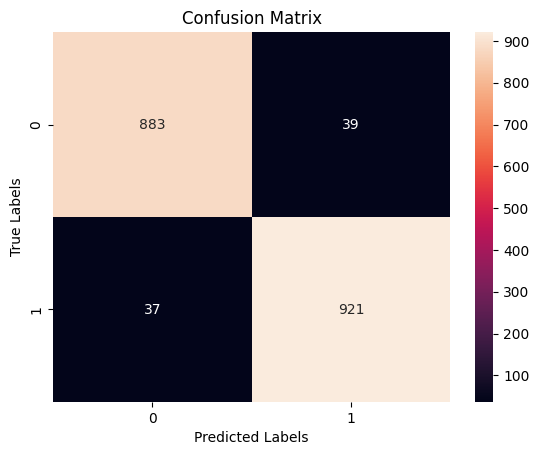

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = DecisionTreeClassifier()
models_ensemble['Hard Voting'] = VotingClassifier(estimators=[('ExTrees', clf1), ('Random Forest', clf2), ('XGB', clf3),('Decision Tree',clf4)], voting='hard')
evaluate(models_ensemble['Hard Voting'],X_train, X_val, Y_train, Y_val,'Hard Voting')

Classification Report:
              precision    recall  f1-score   support

           0     0.9643    0.9664    0.9653       922
           1     0.9676    0.9656    0.9666       958

    accuracy                         0.9660      1880
   macro avg     0.9659    0.9660    0.9659      1880
weighted avg     0.9660    0.9660    0.9660      1880



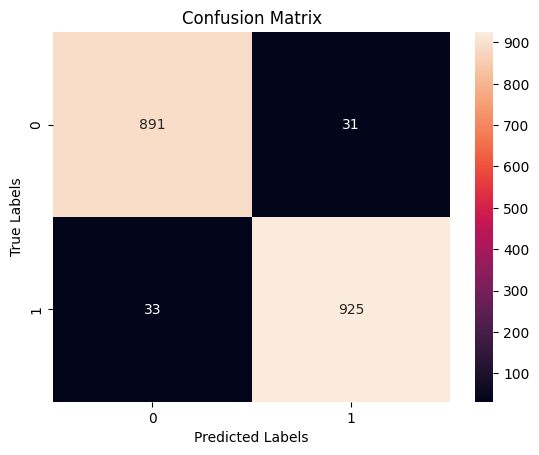

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

models = {
    'Xgboost': XGBClassifier(),
    'Extra Tree Classifier': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Trees': DecisionTreeClassifier()
}

models_ensemble['Stacked'] = StackingClassifier(
    estimators=[
        ('m1', models['Xgboost']),
        ('m2', models['Extra Tree Classifier']),
        ('m3', models['Random Forest']),
        ('m4', models['Decision Trees'])
    ],
    final_estimator=LinearSVC()
)
evaluate(models_ensemble['Stacked'], X_train, X_val, Y_train, Y_val,'Stacked')



In [ ]:
import pandas as pd

df_model_ensemble = pd.DataFrame(index=models_ensemble.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model_ensemble['Accuracy'] = accuracy_ensemble.values()
df_model_ensemble['Precision']= precision_ensemble.values()
df_model_ensemble['Recall'] = recall_ensemble.values()

df_model_ensemble.round(4)

,Accuracy,Precision,Recall
Random Forest,0.9590,0.9656,0.9546
Extra Tree Classifier,0.9532,0.9676,0.9421
Xgboost,0.9521,0.9656,0.9420
Bagging,0.9590,0.9729,0.9481
Gradient Boost,0.8915,0.9186,0.8748
Soft Voting,0.9537,0.9645,0.9458
Hard Voting,0.9596,0.9614,0.9594
Stacked,0.9660,0.9656,0.9676


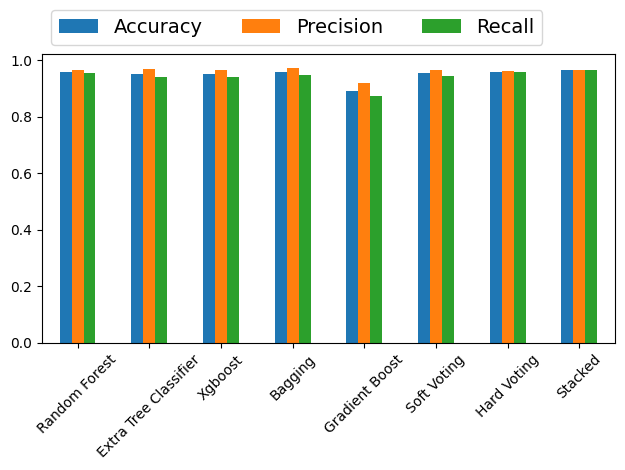

In [ ]:
ax  = df_model_ensemble.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()